In [154]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [155]:
sales_df = pd.read_csv('/Users/genesisoyelaja/Downloads/Kaggle Hub Repository (Datasets)/Supplement_Sales_Weekly_Expanded.csv')
print (f'\nSales dataframe loaded successfully')

print(f'\nFirst 5 rows of dataset:')
sales_df.head()


Sales dataframe loaded successfully

First 5 rows of dataset:


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [156]:
#value counts of the 'Category' column
sales_df['Category'].value_counts()

Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64

In [157]:
print(f'\n Sale__df DataFrame Info:')
sales_df.info()


 Sale__df DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [158]:
#value counts of the 'Category' column
print(f'\n Checking for null-values in df:')
sales_df.isnull().sum()


 Checking for null-values in df:


Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [159]:
#print(f'\n Converting date column to datetime format:')

DATE_COLUMN = sales_df['Date']
TARGET_COLUMN = sales_df['Revenue']



#DATE_COLUMN = pd.to_datetime(sales_df['Date'], format='%Y-%m-%d')
#sales_df['Date'] = DATE_COLUMN
#sales_df['Date'].dtypes


#print( f'\n Conversion Succesfull:', sales_df['Date'].dtypes)
sales_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4384 entries, 0 to 4383
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
4384 non-null   object
dtypes: object(1)
memory usage: 34.4+ KB


In [183]:
# Define y (the target column you want to predict)
y = sales_df['Revenue']

# Define X (all columns EXCEPT the target and any others you want to exclude)
X = sales_df.drop(columns= TARGET_COLUMN, errors='ignore')
#'errors=ignore' prevents errors if a column in COLUMNS_TO_DROP_FOR_X doesn't exist

print(f"Shape of Features X: {X.shape}")
print(f"Shape of Target y: {y.shape}")

Shape of Features X: (4384, 10)
Shape of Target y: (4384,)


In [161]:
print(f'\n Summary statistics of the dataset:')
sales_df.describe()


 Summary statistics of the dataset:


,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [162]:
print(f'\n Handling missing numbers 1.0:')

numerical_cols = sales_df.select_dtypes(include= ['int64', 'float64']).columns
categorical_cols = sales_df.select_dtypes(include= ['object']).columns

print(f'\n Numerical Columns:', '\n', numerical_cols)
print(f'\n Categorical Columns:', '\n', categorical_cols)



 Handling missing numbers 1.0:

 Numerical Columns: 
 Index(['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned'], dtype='object')

 Categorical Columns: 
 Index(['Date', 'Product Name', 'Category', 'Location', 'Platform'], dtype='object')


In [163]:
print(f'\n Handling missing numbers 1.1:')

for col in numerical_cols:
    if sales_df[col].isnull().any():
        median_val = sales_df[col].median()
        sales_df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median ({median_val}).")

for col in categorical_cols:
    if sales_df[col].isnull().any():
        mode_val = sales_df[col].mode()[0]
        sales_df[col].fillna(mode_val, inplace = True)
        print(f"Filled Missing values in categorical column '{col}' with mode ({mode_val}).")

print(f" \n Missing values after handling:")
print (sales_df.isnull().sum())



 Handling missing numbers 1.1:
 
 Missing values after handling:
Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [164]:
for col in categorical_cols:
    if sales_df[col].isnull().any():
        mode_val = sales_df[col].mode[0]
        sales_df[col].fill.na(mode_val, inplace= True)

print(f'sales_df after handling values: \n', sales_df.isnull().sum())

sales_df after handling values: 
 Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [165]:
print(f"\nNumerical Features: {numerical_cols}")
print(f"Categorical Features: {categorical_cols}")


Numerical Features: Index(['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned'], dtype='object')
Categorical Features: Index(['Date', 'Product Name', 'Category', 'Location', 'Platform'], dtype='object')



Visualizing Target Variable Distribution: 


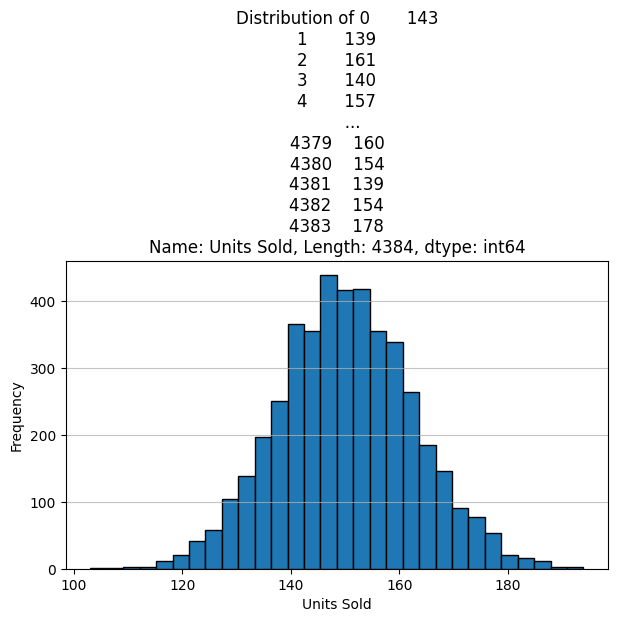

In [166]:
units_sold_col = sales_df['Units Sold'] # Target column variable pulled for historgram visualization
price_col = sales_df['Price'] # Target column variable pulled for historgram visualization

print("\nVisualizing Target Variable Distribution: ")
plt.figure(figsize=(7, 4))
plt.hist(units_sold_col, bins=30, edgecolor='black')
plt.title(f'Distribution of {units_sold_col}')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Text(0, 0.5, 'Frequency')

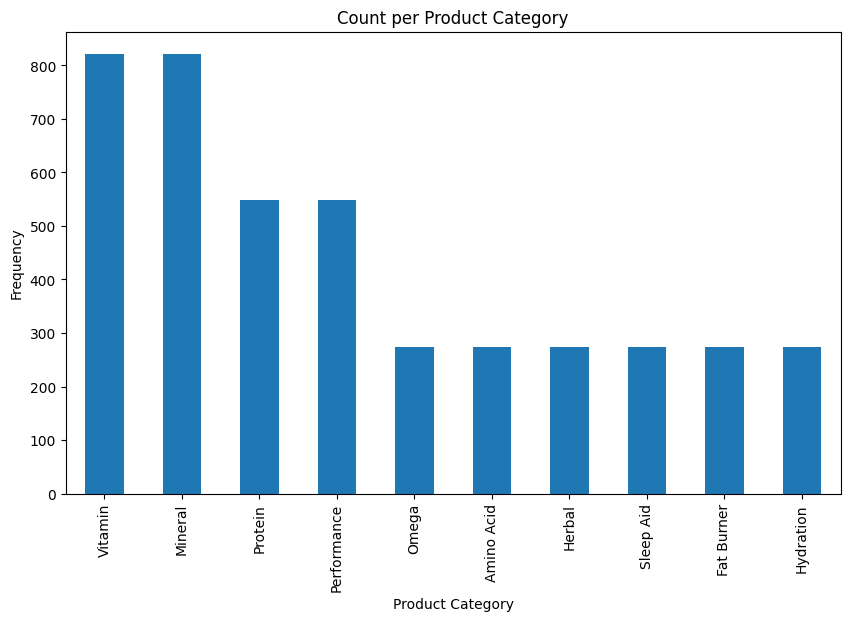

In [167]:
# Count the occurrences of each unique value in the `category` column
product_cat_col = sales_df['Category'].value_counts()   

# Sort the genres by frequency in descending order and select the top 10 category
sales_df['Category'].head(10)

# Create a bar chart to display the category by frequency
plt.figure(figsize=(10, 6)) 
product_cat_col.plot(kind='bar')

# Add title and labels
plt.title('Count per Product Category') # insert code here 
plt.xlabel('Product Category') # insert code here 
plt.ylabel('Frequency') # insert code here 

# Display the plot using plt.show()
# insert code here 

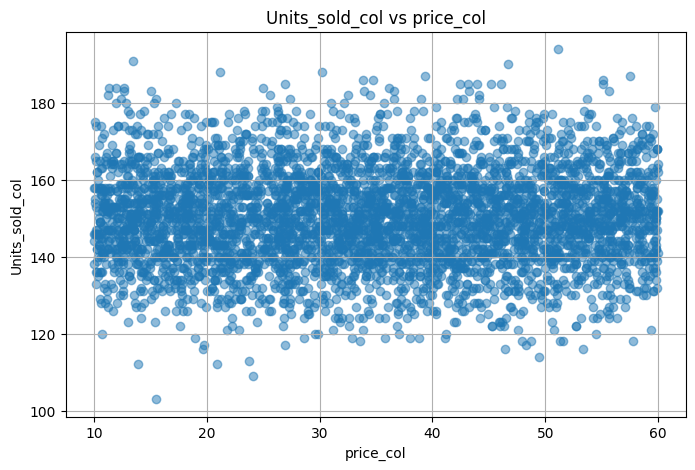

In [168]:
if len(numerical_cols) > 0:
    feature_to_plot = numerical_cols[0] # Example: plot the first numerical feature
    plt.figure(figsize=(8, 5))
    plt.scatter(price_col, units_sold_col, alpha=0.5)
    plt.title(f'{'Units_sold_col'} vs {'price_col'}')
    plt.xlabel('price_col')
    plt.ylabel('Units_sold_col')
    plt.grid(True)
    plt.show()

In [169]:
# Example of where lists might be defined (find the equivalent in your code)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# If you added date features manually:
# numerical_features.extend(['Year', 'Month', 'Day']) # Example

# --->>> Add this line <<<---
print("\n--- Features passed to ColumnTransformer ---")
print("Numerical features list:", numerical_features)
print("Categorical features list:", categorical_features)

# --- Then the ColumnTransformer definition ---
# numerical_transformer = Pipeline(...)
# categorical_transformer = Pipeline(...)
# preprocessor = ColumnTransformer(...)


--- Features passed to ColumnTransformer ---
Numerical features list: ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']
Categorical features list: ['Date', 'Product Name', 'Category', 'Location', 'Platform']


In [170]:
print("\n--- Feature Preprocessing ---")

# Create preprocessing pipelines for numerical and categorical features
# Numerical features will be scaled
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical features will be one-hot encoded
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Use sparse_output=False for easier handling later if needed
])

# Create a preprocessor object using ColumnTransformer
# This applies the correct transformer to each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, sales_df[numerical_cols].columns),
        ('cat', categorical_transformer, sales_df[categorical_cols].columns)
    ],
    remainder='passthrough' # Keep other columns (if any) - adjust if necessary
)

print("Preprocessor defined.")


--- Feature Preprocessing ---
Preprocessor defined.


In [178]:
print("\n--- Train-Test Split ---")

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


--- Train-Test Split ---
Training set shape: X_train=(3507, 10), y_train=(3507,)
Testing set shape: X_test=(877, 10), y_test=(877,)


In [184]:
print("\n--- Model Training ---")

# --- Model 1: Linear Regression ---
print("\nTraining Linear Regression Model...")
# Create a pipeline that includes preprocessing and the linear regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Train the model
lr_pipeline.fit(X_train, y_train)
print("Linear Regression Model Trained.")

# --- Model 2: Random Forest Regressor ---
print("\nTraining Random Forest Regressor Model...")
# Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, # Number of trees
                                                                random_state=42,
                                                                n_jobs=-1))]) # Use all available CPU cores

# Train the model
rf_pipeline.fit(X_train, y_train)
print("Random Forest Regressor Model Trained.")


--- Model Training ---

Training Linear Regression Model...
Linear Regression Model Trained.

Training Random Forest Regressor Model...
Random Forest Regressor Model Trained.


In [185]:
print("\n--- Model Evaluation ---")

# --- Evaluate Linear Regression ---
print("\nEvaluating Linear Regression:")
y_pred_lr = lr_pipeline.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"  Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"  R-squared (R²): {r2_lr:.4f}")

# --- Evaluate Random Forest ---
print("\nEvaluating Random Forest Regressor:")
y_pred_rf = rf_pipeline.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R²): {r2_rf:.4f}")


--- Model Evaluation ---

Evaluating Linear Regression:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  Root Mean Squared Error (RMSE): 0.00
  R-squared (R²): 1.0000

Evaluating Random Forest Regressor:
  Mean Absolute Error (MAE): 1.79
  Mean Squared Error (MSE): 8.93
  Root Mean Squared Error (RMSE): 2.99
  R-squared (R²): 1.0000



--- Results Visualization ---


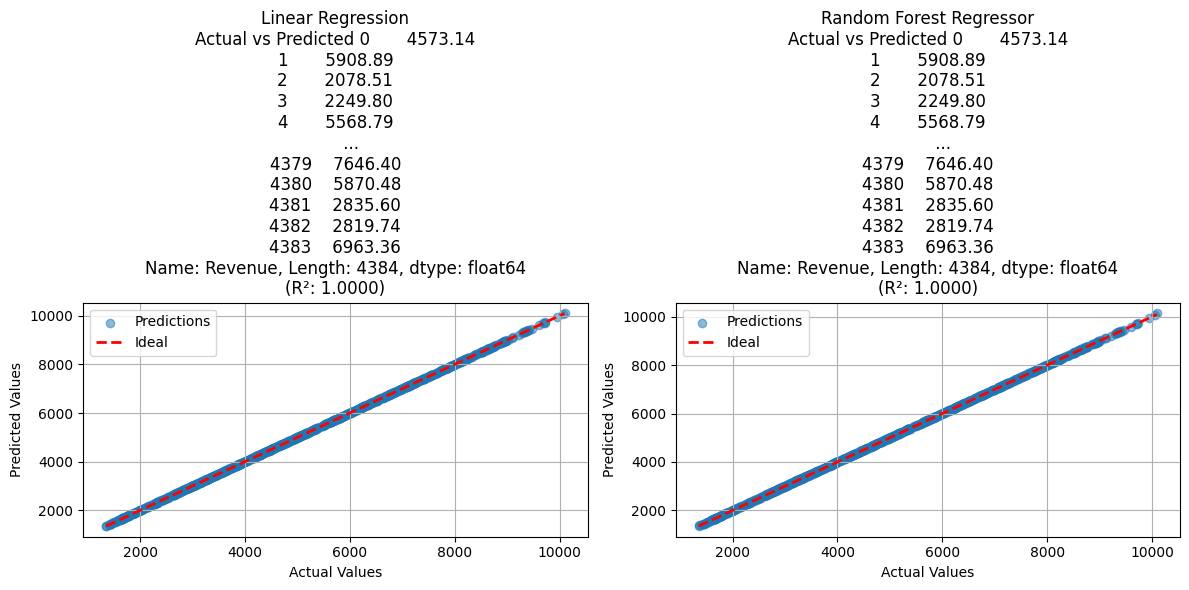

In [174]:
print("\n--- Results Visualization ---")

plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal')
plt.title(f'Linear Regression\nActual vs Predicted {TARGET_COLUMN}\n(R²: {r2_lr:.4f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Random Forest Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal')
plt.title(f'Random Forest Regressor\nActual vs Predicted {TARGET_COLUMN}\n(R²: {r2_rf:.4f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()